In [139]:
import pandas as pd  
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from datetime import date
from datetime import datetime

# Inspect Scraped Data

In [140]:
# read in the scraped data CSV
df_original_scrape = pd.read_csv ('all_scraped_recipes.csv')

In [141]:
# find the number of columns in the data frame
len(df_original_scrape.columns)

38

In [142]:
# df_original_scrape.head(1)

In [143]:
# rename columns for clarity
df_original_scrape.rename(columns = {'ingredients': 'ingredients_string'}, inplace=True)
df_original_scrape.rename(columns = {'ingredient': 'ingredients_list'}, inplace=True)

In [144]:
# drop the columns that can't be used for anything
# col 'partner' only has 102 entries, all are 'harpercollins', this is captured in col 'source'

drop_col = ['active_time', 'image_url', 'date', 'url', 'partner' , 'rating_normalized', 'rating_factor']
df_original_scrape.drop(columns = drop_col, inplace = True)

In [145]:
# df_original_scrape.describe()

In [146]:
df_original_scrape.dtypes

author                    object
ingredients_string        object
make_again                object
month                     object
rating                   float64
reviews                  float64
title                     object
year                     float64
cuisine                   object
technique                 object
occasion                  object
meal                      object
ingredients_list          object
special-consideration     object
type                      object
source                    object
equipment                 object
tag                       object
location                  object
cal                      float64
carb                      object
fat                       object
protein                   object
sat_fat                   object
sodium                    object
polyunsat_fat             object
fiber                     object
monounsat_fat             object
cholesterol               object
servings                  object
ingredient

# Parse Columns With Numeric Values

In [147]:
def parse_numeric_value(param):
    retVal = ''
    try:
        for v in list(param):
            if v.isnumeric():
                retVal += v
            else:
                break;
    except Exception:
        retVal = 'Nan'
    return float(retVal)

In [148]:
def parse_servings(param):
    retVal = 'Nan'
    try:
        param = param.replace("(", "")
        param = param.replace(")", "")
    #     print(param)
        for v in param.split():
    #         print(v)
            if v.isnumeric():
                retVal = v;
                break;
    except Exception:
        retVal = 'Nan'
    return float(retVal)

In [149]:
cols = ['carb', 'fat', 'protein', 'sat_fat','sodium', 'polyunsat_fat', 'fiber', 'monounsat_fat', 'cholesterol', 'make_again']

In [150]:
new_cols = ['carb_split', 'fat_split', 'protein_split', 'sat_fat_split','sodium_split', 'polyunsat_fat_split', 'fiber_split', 'monounsat_fat_split', 'cholesterol_split', 'make_again_split']

In [151]:
index = 0
for col in cols:
    new_col=new_cols[index]
    df_original_scrape[new_col] = df_original_scrape[col].apply(parse_numeric_value)
    index +=1

In [152]:
df_original_scrape['servings_split'] = df_original_scrape['servings'].apply(parse_servings)

In [153]:
# df_original_scrape.dtypes

In [154]:
# df_original_scrape.boxplot(figsize=(30, 6))

In [155]:
df_original_scrape.shape[0]

37085

In [156]:
# df_original_scrape.isna().sum()

In [157]:
# drop NaN values
# df_original_scrape = df_original_scrape.dropna()
# df_original_scrape.shape[0] # number of rows and columns

In [158]:
# add value counts from meal, cuisine, and tag to get tags_count

# add a column for count of tags
# df_original_scrape['tags_count'] = df_original_scrape['tag'].apply(lambda x: len(x))

In [159]:
# change the categories header to tags
df_original_scrape.rename(columns = {'categories': 'tag'}, inplace=True)

In [160]:
# df_original_scrape['date'] = df_original_scrape['date'].dropna()

In [161]:
# write a function that converts month name to a number
def month_string_to_number(string):
    m = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    s = str(string).strip()[:3].lower()

    try:
        out = m[s]
        return out
    except:
        return

In [162]:
df_original_scrape['month_num'] = df_original_scrape['month'].apply(month_string_to_number)

In [163]:
df_original_scrape['year_num'] = (2020 - df_original_scrape['year'])

In [164]:
df_original_scrape['age_recipe'] = (2020 - df_original_scrape['year']) + df_original_scrape['month_num']/12

In [165]:
df_original_scrape.head()

,author,ingredients_string,make_again,month,rating,reviews,title,year,cuisine,technique,...,sodium_split,polyunsat_fat_split,fiber_split,monounsat_fat_split,cholesterol_split,make_again_split,servings_split,month_num,year_num,age_recipe
0,Joyce Goldstein,"['4 tablespoons olive oil', '2 large onions, c...",90%,September,3.5,19.0,Braised Meat with Butternut Squash,1998.0,"['italian', 'jewish']","['braise', 'stew']",...,848.0,2.0,2.0,8.0,129.0,90.0,6.0,9.0,22.0,22.75
1,Joyce Goldstein,"['1 lemon', '1 roasting chicken, about 5 pound...",83%,September,3.0,53.0,"Roast Chicken with Orange, Lemon, and Ginger",1998.0,"['italian', 'jewish']","['roast', 'saute']",...,1658.0,16.0,2.0,39.0,356.0,83.0,4.0,9.0,22.0,22.75
2,Faith Willinger,"['1 cup (about 6 ounces) half-peeled emmer, sp...",71%,September,4.0,7.0,"Massimo's ""Farinella""",1996.0,['italian'],['chill'],...,990.0,1.0,2.0,6.0,NaN,71.0,6.0,9.0,24.0,24.75
3,Faith Willinger,"['1 large (about 1/2 pound) boiling potatoes',...",85%,September,3.0,27.0,Franco's Pasta with Zucchini and Potatoes,1996.0,['italian'],NaN,...,793.0,1.0,4.0,9.0,39.0,85.0,6.0,9.0,24.0,24.75
4,Joan Nathan,"['1 4-pound frying chicken, cut up into 8 piec...",71%,September,3.0,5.0,Jennie June's Brown Fricassée Chicken,1998.0,['jewish'],NaN,...,1138.0,8.0,3.0,23.0,154.0,71.0,6.0,9.0,22.0,22.75


In [166]:
df_original_scrape.to_csv('df_original_scrape.csv', index=False)

# Data Visualization

In [167]:
# read in updated scraped data
df_vis = pd.read_csv ('df_original_scrape.csv')

In [168]:
# let's update to a new dataframe name for visualization 
# df_vis = df_original_scrape

In [169]:
# df_vis.head()

In [170]:
# df_vis.describe()

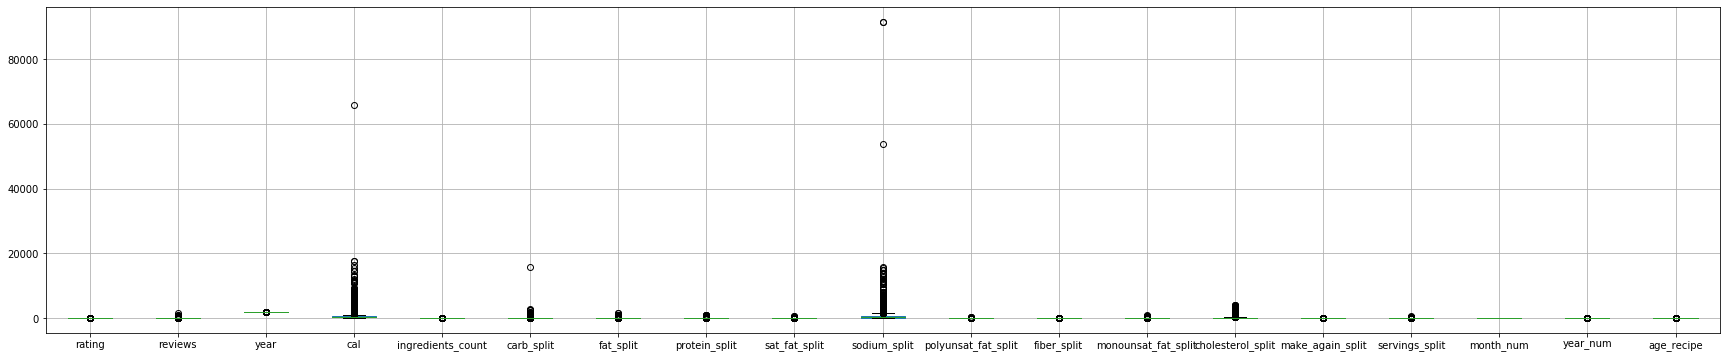

In [171]:
df_vis.boxplot(figsize=(30, 6))

In [120]:
cols = ['rating', 'reviews','year', 'cal', 'fat', 'protein', 'ingredients_count', 
        'carb_split', 'sat_fat_split', 'sodium_split', 'polyunsat_fat_split', 'fiber_split',
        'monounsat_fat_split', 'cholesterol_split', 'make_again_split', 'servings_split']

In [121]:
# count the number of unique rating values
rating_counts = df_vis['rating'].value_counts()

# count the total number of ratings
rc_total = df_vis['rating'].count()

# 
rating_counts = rating_counts.rename_axis('rating').reset_index(name = 'counts')

# unique rating value / total number of ratings * 100 = unique rating percentage
rating_counts['percentage'] = ((rating_counts['counts']/rc_total)*100).map('{:,.1f}%'.format)
rating_counts

,rating,counts,percentage
0,3.5,14373,38.8%
1,3.0,9516,25.7%
2,4.0,5325,14.4%
3,0.0,3243,8.8%
4,2.5,2908,7.8%
5,2.0,1091,2.9%
6,1.0,343,0.9%
7,1.5,258,0.7%


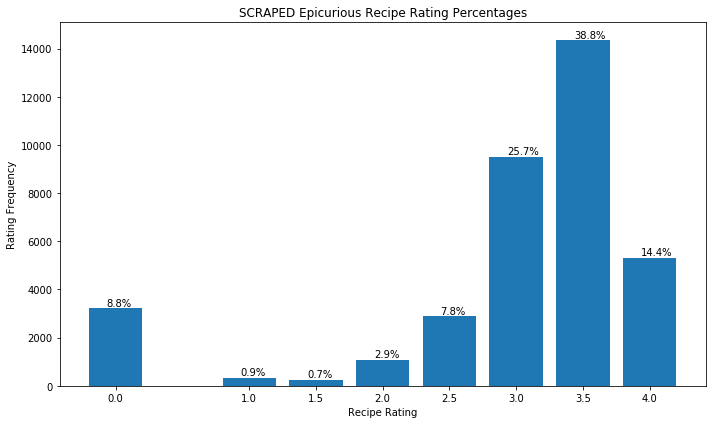

In [122]:
x_rating = rating_counts['rating']
y_feature = rating_counts['counts']

plt.figure(figsize=(10, 6)) 
labels = rating_counts['rating']
barplot = plt.bar(x_rating, y_feature, width = 0.4, label = labels)

bar_var = 0

for bar in barplot:

    label_height = bar.get_height()
    label_value = rating_counts['percentage'][bar_var]

    plt.text(bar.get_x() + bar.get_width()/3, label_height, label_value, va='bottom')
    
    bar_var += 1 
        

plt.title("SCRAPED Epicurious Recipe Rating Percentages")
plt.xticks(x_rating, labels)
plt.xlabel("Recipe Rating")
plt.ylabel("Rating Frequency")
plt.tight_layout()

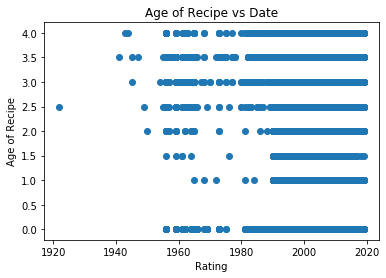

In [123]:
x_rating = df_vis['year']
y_feature = df_vis['rating']

plt.scatter(x_rating, y_feature)
plt.title("Age of Recipe vs Date")
plt.xlabel("Rating")
plt.ylabel("Age of Recipe")
plt.show()

# Data Cleaning